In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## 機械学習スクラッチ入門

今後の機械学習スクラッチ課題で作成するモデルを、scikit-learnを用いて一度動かしておきます。これまでの復習を兼ねたスクラッチ課題の準備です。

ここでのスクラッチとは、NumPyなどの基本的なライブラリを組み合わせることで、scikit-learnのような応用的なライブラリと同じ機能のクラス・関数を自作することを指します。

スクラッチをすることでscikit-learnなどのライブラリを動かすだけでは掴みづらい、アルゴリズムの深い理解を目指します。コーディングのスキル向上も兼ねますが、それは主な目的ではありません。

以下のような効果を狙っています。

新たな手法に出会った時に理論・数式を理解しやすくする

ライブラリを使う上での曖昧さを減らす

既存の実装を読みやすくする

## 【問題1】train_test_splitのスクラッチ

In [2]:
X = np.arange(1 , 101).reshape(50 , 2)
y = np.arange(1 , 51).reshape(-1 , 1)

In [3]:
def scratch_train_test_split(X, y, train_size=0.8, seed = 0):
    """
    検証用データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      学習データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    #ここにコードを書く
    if type(X) != np.ndarray:
        X = np.array(X)
    if type(y) != np.ndarray:
        y = np.array(y)
    np.random.seed(seed)
    Xy = np.concatenate([X , y.reshape(-1 , 1)] , axis =1) 
    np.random.shuffle(Xy)
    train_index = int(train_size * Xy.shape[0])
    
    
    X_train = Xy[:train_index , :-1]
    X_test = Xy[train_index: , :-1]
    y_train = Xy[:train_index , -1]
    y_test = Xy[train_index: , -1]
    

    return X_train, X_test, y_train, y_test

In [4]:
Xy = np.concatenate([X, y.reshape(-1 , 1)] , axis = 1)

In [5]:
train = Xy.shape[0] * 0.8
train

40.0

In [6]:
X_train , X_test , y_train , y_test = scratch_train_test_split(
                X , y , train_size = 0.8)

In [7]:
X_train.shape

(40, 2)

In [8]:
y_train.shape

(40,)

## 【問題2】 分類問題を解くコードの作成

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(data = iris.data)
y = pd.DataFrame(data = iris.target)
X.columns = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
y.columns = ["Species"]

In [10]:
df = pd.concat([X , y] , axis = 1)

In [11]:
df_cn = df.query("Species == [1,2]").iloc[: , :]

In [12]:
X = df_cn.iloc[: , :-1].values
y = df_cn.iloc[: , -1].values

In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score ,  confusion_matrix

In [15]:
def learn_model(X , y , model):
    X_train ,X_test, y_train, y_test = scratch_train_test_split(
               X[: , 1:3] , y , train_size = 0.8)
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    acc_score = accuracy_score(y_test , y_pred)
    pre_score = precision_score (y_test , y_pred)
    rec_score = recall_score(y_test , y_pred)
    f_score = f1_score(y_test , y_pred)
    con_mat = confusion_matrix(y_test , y_pred)
    print("accuracy_score" , acc_score)
    print("precision_score" , pre_score)
    print("recall_score" , rec_score)
    print("f1_score" , f_score)
    print("confusion_matrix" , con_mat)

## データセット１　iris

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [17]:
X_train ,X_test, y_train, y_test = scratch_train_test_split(
               X , y , train_size = 0.8)

In [18]:
#ロジスティック回帰
log = SGDClassifier(loss = "log")
#log.fit(X_train[:, 1:3], y_train)
#y_pred = log.predict(X_test[:, 1:3])
learn_model(X , y , log)

accuracy_score 0.5
precision_score 0.0
recall_score 0.0
f1_score 0.0
confusion_matrix [[ 0 10]
 [ 0 10]]


/Users/hayashikentaro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/hayashikentaro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hayashikentaro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted

In [19]:
log.fit(X_train[:,1:3] , y_train)

/Users/hayashikentaro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

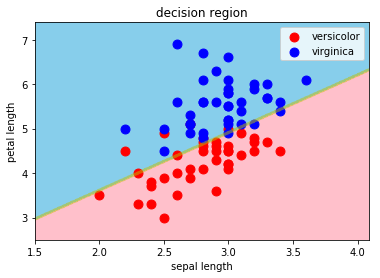

In [20]:
decision_region(X_train[:,1:3] , y_train  ,log,  title='decision region', xlabel='sepal length', 
                             ylabel='petal length', target_names=['versicolor', 'virginica'])

In [21]:
#SVM
svm = SVC()
#svm.fit(X_train , y_train)
#y_pred = svm.predict(X_test)
learn_model(X , y, svm)

accuracy_score 0.95
precision_score 0.9090909090909091
recall_score 1.0
f1_score 0.9523809523809523
confusion_matrix [[10  0]
 [ 1  9]]


In [22]:
svm.fit(X_train[:,1:3] , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

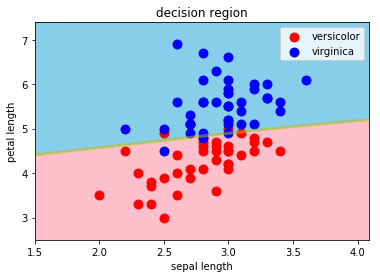

In [23]:
decision_region(X_train[:,1:3], y_train  ,svm,  title='decision region', xlabel='sepal length', 
                             ylabel='petal length', target_names=['versicolor', 'virginica'])

In [24]:
#決定木
tree = DecisionTreeClassifier()
#tree.fit(X_train , y_train)
#y_pred = tree.predict(X_test)
learn_model(X, y , tree)

accuracy_score 0.95
precision_score 0.9090909090909091
recall_score 1.0
f1_score 0.9523809523809523
confusion_matrix [[10  0]
 [ 1  9]]


In [25]:
tree.fit(X_train[:,1:3], y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

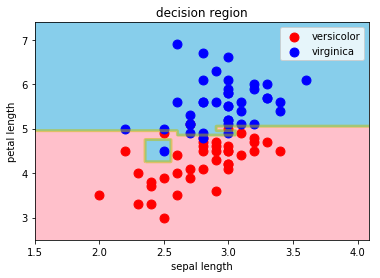

In [26]:
decision_region(X_train[:,1:3], y_train  ,tree,  title='decision region', xlabel='sepal length', 
                             ylabel='petal length', target_names=['versicolor', 'virginica'])

## データセット２

In [27]:
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [28]:
def learn_model(X , y, model):
    X_train ,X_test, y_train, y_test = scratch_train_test_split(
               X , y , train_size = 0.8)
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    acc_score = accuracy_score(y_test , y_pred)
    pre_score = precision_score (y_test , y_pred)
    rec_score = recall_score(y_test , y_pred)
    f_score = f1_score(y_test , y_pred)
    con_mat = confusion_matrix(y_test , y_pred)
    print("accuracy_score" , acc_score)
    print("precision_score" , pre_score)
    print("recall_score" , rec_score)
    print("f1_score" , f_score)
    print("confusion_matrix" , con_mat)

In [29]:
X_train ,X_test, y_train, y_test = scratch_train_test_split(
            X , y , train_size = 0.8)

In [30]:
#ロジスティック回帰
log = SGDClassifier(loss = "log")
#log.fit(X_train , y_train)
#y_pred = log.predict(X_test)
learn_model(X, y , log)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0
confusion_matrix [[56  0]
 [ 0 44]]


/Users/hayashikentaro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [31]:
#SVM
svm = SVC()
#svm.fit(X_train , y_train)
#y_pred = svm.predict(X_test)
learn_model(X, y, svm)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0
confusion_matrix [[56  0]
 [ 0 44]]


In [32]:
#決定木
tree = DecisionTreeClassifier()
#tree.fit(X_train , y_train)
#y_pred = tree.predict(X_test)
learn_model(X , y , tree)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0
confusion_matrix [[56  0]
 [ 0 44]]


In [33]:
log.fit(X_train , y_train)

/Users/hayashikentaro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

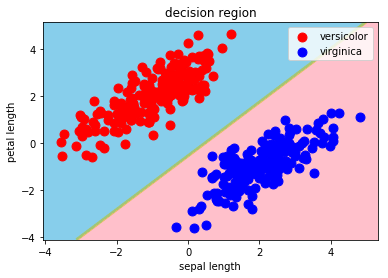

In [34]:
decision_region(X_train , y_train  ,log,  title='decision region', xlabel='sepal length', 
                             ylabel='petal length', target_names=['versicolor', 'virginica'])

In [35]:
svm.fit(X_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

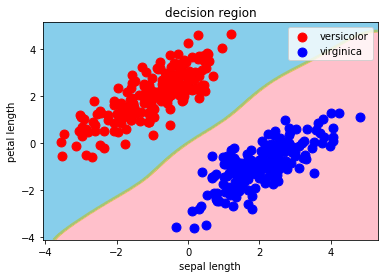

In [36]:
decision_region(X_train , y_train  ,svm,  title='decision region', xlabel='sepal length', 
                             ylabel='petal length', target_names=['versicolor', 'virginica'])

In [37]:
tree.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

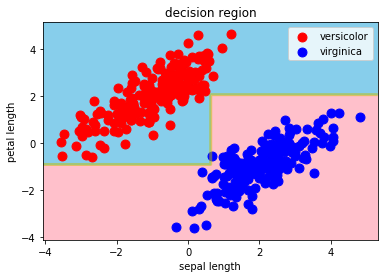

In [38]:
decision_region(X_train , y_train  ,tree,  title='decision region', xlabel='sepal length', 
                             ylabel='petal length', target_names=['versicolor', 'virginica'])

## データセット３

In [39]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [40]:
#ロジスティック回帰
log = SGDClassifier(loss = "log")
learn_model(X , y , log)

accuracy_score 0.5
precision_score 0.42857142857142855
recall_score 1.0
f1_score 0.6
confusion_matrix [[1 4]
 [0 3]]


/Users/hayashikentaro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [41]:
#SVM
svm = SVC()
learn_model(X , y , svm)

accuracy_score 0.75
precision_score 0.6
recall_score 1.0
f1_score 0.7499999999999999
confusion_matrix [[3 2]
 [0 3]]


In [42]:
#決定木
tree = DecisionTreeClassifier()
learn_model(X , y , tree)

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0
confusion_matrix [[5 0]
 [0 3]]


In [43]:
log.fit(X_train , y_train)

/Users/hayashikentaro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

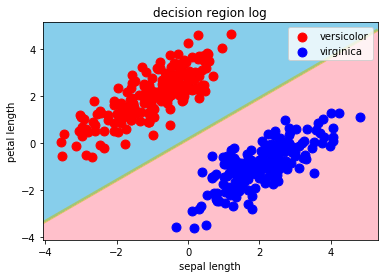

In [44]:
decision_region(X_train , y_train  ,log,  title='decision region log', xlabel='sepal length', 
                             ylabel='petal length', target_names=['versicolor', 'virginica'])

In [45]:
svm.fit(X_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

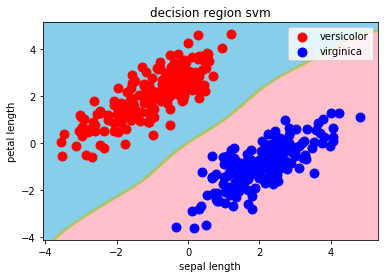

In [46]:
decision_region(X_train , y_train  ,svm,  title='decision region svm', xlabel='sepal length', 
                             ylabel='petal length', target_names=['versicolor', 'virginica'])

In [47]:
tree.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

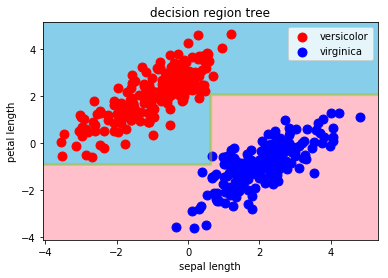

In [48]:
decision_region(X_train , y_train  ,tree,  title='decision region tree', xlabel='sepal length', 
                             ylabel='petal length', target_names=['versicolor', 'virginica'])

## 【問題3】 回帰問題を解くコードの作成

In [49]:
df = pd.read_csv("train.csv")

In [50]:
X = df.loc[: , ["GrLivArea" , "YearBuilt"]].values
y = df.loc[: , "SalePrice"].values

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor

In [52]:
def learn_sgdr(X , y ):
    X_train , X_test , y_train , y_test = scratch_train_test_split(
                  X , y , train_size = 0.8)
    sgdr = SGDRegressor()
    sgdr.fit(X_train , y_train)
    y_pred = sgdr.predict(X_test)
    mse = mean_squared_error(y_test , y_pred)
    mean = mean_absolute_error(y_test , y_pred)
    r2 = r2_score(y_test , y_pred)
    print("平均二乗誤差" , mse)
    print("平均絶対誤差" ,mean )
    print("決定係数" , r2)

In [53]:
learn_sgdr(X , y)

平均二乗誤差 3.517785762456581e+31
平均絶対誤差 5785473293746091.0
決定係数 -7.142127774840723e+21


/Users/hayashikentaro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
